<a href="https://colab.research.google.com/github/leejane0815/datamining/blob/main/Datamining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder

**굵은 텍스트**
# activity 데이터 업로드

In [ ]:
import pandas as pd
# 수면 훈련 데이터
train_activity = pd.read_csv('/content/train_activity.csv')
train_activity #9705
val_activity = pd.read_csv('/content/val_activity.csv')
val_activity #2478

,EMAIL,activity_average_met,activity_cal_active,activity_cal_total,activity_class_5min,activity_daily_movement,activity_day_end,activity_day_start,activity_high,activity_inactive,...,activity_score_meet_daily_targets,activity_score_move_every_hour,activity_score_recovery_time,activity_score_stay_active,activity_score_training_frequency,activity_score_training_volume,activity_steps,activity_total,CONVERT(activity_class_5min USING utf8),CONVERT(activity_met_1min USING utf8)
0,nia+404@rowan.kr,1.71875,730,2944,...,14346,2020-11-28T03:59:59+09:00,2020-11-27T04:00:00+09:00,0,417,...,95,100,100,86,100,98,15867,592,2/1/1/1/1/1/2/2/1/1/1/1/1/1/2/2/2/3/2/2/2/2/2/...,0.9/0.9/1.4/1.9/1.1/0.9/0.9/1.1/1.3/1/0.9/1.1/...
1,nia+404@rowan.kr,1.40625,342,2449,...,6352,2020-11-29T03:59:59+09:00,2020-11-28T04:00:00+09:00,0,473,...,78,100,100,83,100,97,7755,400,1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/2/2/2/2/2/2/...,1.2/1.1/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0....
2,nia+404@rowan.kr,1.46875,401,2544,...,7297,2020-11-30T03:59:59+09:00,2020-11-29T04:00:00+09:00,0,586,...,95,100,100,71,96,96,8341,386,1/1/1/1/1/1/1/2/1/1/1/1/2/2/2/2/2/1/1/1/1/1/2/...,1.1/1.1/1.2/1.1/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0....
3,nia+404@rowan.kr,0.34375,27,1850,...,491,2020-12-01T03:59:59+09:00,2020-11-30T04:00:00+09:00,0,176,...,95,100,100,74,96,92,8122,35,2/1/2/2/1/2/1/1/2/1/1/1/1/1/2/1/1/1/1/1/2/2/2/...,0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/0/...
4,nia+404@rowan.kr,1.46875,333,2518,...,5861,2020-12-02T03:59:59+09:00,2020-12-01T04:00:00+09:00,0,646,...,95,100,100,65,71,80,7378,383,1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/2/2/3/3/2/...,0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0....
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2473,nia+280@rowan.kr,1.59375,648,2760,...,12256,2021-02-13T03:59:59+09:00,2021-02-12T04:00:00+09:00,0,444,...,100,100,95,88,100,100,14654,447,1/2/1/1/1/2/2/3/3/2/5/3/2/2/2/2/2/1/2/1/1/1/1/...,1.2/0.9/0.9/0.9/1.1/1.1/0.9/1.1/2.4/0.9/0.9/0....
2474,nia+280@rowan.kr,1.43750,379,2507,...,6973,2021-02-14T03:59:59+09:00,2021-02-13T04:00:00+09:00,0,623,...,100,100,89,65,100,99,8425,374,1/1/1/1/1/2/2/2/3/3/4/2/2/2/2/1/2/2/1/1/1/2/1/...,0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0....
2475,nia+280@rowan.kr,1.56250,670,2747,...,13008,2021-02-16T03:59:59+09:00,2021-02-15T04:00:00+09:00,0,422,...,100,100,100,95,100,99,15341,442,3/3/3/3/3/2/3/3/2/2/2/2/2/2/2/2/2/2/2/2/1/2/1/...,2.1/1.9/2.2/2.4/2.8/2.2/1.9/1.7/1.9/1.4/2.6/1....
2476,nia+280@rowan.kr,1.46875,556,2570,...,11043,2021-02-17T03:59:59+09:00,2021-02-16T04:00:00+09:00,0,452,...,100,78,95,87,100,100,12006,312,1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/1/...,0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0.9/0....


# sleep 데이터 업로드

In [ ]:
import pandas as pd
# 수면 훈련 데이터
train_sleep = pd.read_csv('/content/train_sleep.csv')
train_sleep #9705

,EMAIL,sleep_awake,sleep_bedtime_end,sleep_bedtime_start,sleep_breath_average,sleep_deep,sleep_duration,sleep_efficiency,sleep_hr_5min,sleep_hr_average,...,sleep_score_efficiency,sleep_score_latency,sleep_score_rem,sleep_score_total,sleep_temperature_delta,sleep_temperature_deviation,sleep_total,CONVERT(sleep_hr_5min USING utf8),CONVERT(sleep_hypnogram_5min USING utf8),CONVERT(sleep_rmssd_5min USING utf8)
0,nia+279@rowan.kr,8700,2020-10-19T05:10:28+09:00,2020-10-18T18:38:28+09:00,17.875,10110,37920,77,...,53.04,...,65,89,56,94,0.00,0.00,29220,63/61/59/58/58/58/56/55/54/53/53/53/0/0/54/57/...,4/2/2/2/2/1/1/2/2/2/2/2/4/4/4/1/1/4/4/4/2/2/2/...,18/28/25/28/34/34/35/45/54/36/36/60/0/0/34/22/...
1,nia+279@rowan.kr,6570,2020-10-20T05:37:52+09:00,2020-10-19T21:39:52+09:00,18.000,7440,28680,77,...,52.82,...,65,97,43,65,0.34,0.34,22110,0/51/0/51/52/52/52/52/53/53/53/52/52/53/53/53/...,4/2/4/2/2/2/1/1/1/2/2/3/3/3/3/3/3/3/1/1/1/4/4/...,0/49/0/38/51/17/18/18/26/27/24/29/36/31/32/34/...
2,nia+279@rowan.kr,10530,2020-10-21T05:45:28+09:00,2020-10-20T20:51:28+09:00,18.000,4620,32040,67,...,52.01,...,41,75,68,62,-0.07,-0.07,21510,54/56/0/55/53/55/56/55/0/55/54/54/54/0/0/55/55...,4/2/1/1/2/2/4/4/4/4/2/2/2/4/4/4/2/4/4/4/4/4/4/...,56/47/0/49/42/57/44/49/0/46/54/47/55/0/0/55/53...
3,nia+279@rowan.kr,4080,2020-10-22T05:12:16+09:00,2020-10-21T22:08:16+09:00,17.500,7440,25440,84,...,51.07,...,81,83,73,62,-0.14,-0.14,21360,0/54/53/53/54/54/54/53/53/53/53/54/51/50/51/51...,4/4/1/1/1/1/1/1/1/1/1/4/2/2/2/2/1/1/1/1/1/4/2/...,0/40/40/40/37/46/35/46/44/56/50/48/41/55/55/50...
4,nia+279@rowan.kr,7170,2020-10-23T02:23:30+09:00,2020-10-22T20:38:30+09:00,17.875,4320,20700,65,...,50.80,...,39,78,25,29,-0.50,-0.50,13530,0/49/50/50/50/50/50/50/51/0/0/0/0/0/0/0/0/50/5...,4/2/2/2/2/1/1/1/2/4/4/4/4/4/4/4/4/4/2/1/1/1/1/...,0/81/60/74/62/63/56/78/81/0/0/0/0/0/0/0/0/60/4...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9700,nia+206@rowan.kr,6000,2020-12-24T06:51:37+09:00,2020-12-23T21:35:37+09:00,15.875,1710,33360,82,...,63.75,...,76,81,95,86,-0.09,-0.09,27360,68/66/67/67/68/69/69/70/71/71/71/69/72/70/70/7...,4/4/2/2/2/1/1/1/1/1/1/2/2/3/3/2/2/2/2/2/3/4/2/...,26/16/19/18/16/18/19/17/15/16/15/13/11/13/13/1...
9701,nia+206@rowan.kr,5700,2020-12-26T06:36:19+09:00,2020-12-25T22:54:19+09:00,16.125,0,27720,79,...,67.40,...,69,86,89,64,0.41,0.41,22020,0/0/65/65/66/67/69/72/73/72/73/74/73/74/75/75/...,4/4/2/2/2/2/2/2/2/2/2/2/4/4/4/4/2/3/3/3/2/2/4/...,0/0/13/12/12/13/12/12/12/16/13/12/13/17/13/18/...
9702,nia+206@rowan.kr,5070,2020-12-27T07:56:40+09:00,2020-12-26T22:05:40+09:00,15.625,480,35460,86,...,64.84,...,86,89,98,97,0.27,0.27,30390,0/0/0/64/64/64/64/65/65/66/66/66/66/68/68/68/6...,4/4/4/4/2/2/2/2/2/2/2/2/2/3/3/3/3/2/4/4/2/2/2/...,0/0/0/14/17/18/14/14/17/15/17/12/17/12/13/12/1...
9703,nia+206@rowan.kr,2040,2020-12-28T05:05:45+09:00,2020-12-27T21:21:45+09:00,15.875,2220,27840,93,...,67.05,...,98,89,86,80,-0.05,-0.05,25800,0/60/60/61/60/60/60/62/64/64/64/64/65/68/70/70...,4/4/1/2/2/2/2/1/2/2/2/1/1/1/3/3/1/1/2/2/3/3/3/...,0/14/15/14/15/16/17/16/16/18/18/20/23/15/21/20...


# 걸음걸이 데이터셋(TRAIN)에 치매 라벨링 데이터 합치기
  치매 라벨링 데이터 -> 정상(0), 경도 인식 장애(1), 치매(2)로 변환해서 추가

In [ ]:
# 걸음걸이
# 데이터 합치기 및 라벨링 데이터에서 치매 진단 컬럼 추가
import pandas as pd
# 걸음걸이 라벨링 데이터
activity_label = pd.read_csv('/content/walking_training_label.csv')

# 데이터셋 합치기
combined_activity_data = train_activity

# 전처리할 수 없는 컬럼 제거
combined_activity_data = combined_activity_data.drop(['activity_class_5min','activity_met_1min', 'CONVERT(activity_class_5min USING utf8)', 'CONVERT(activity_met_1min USING utf8)'], axis=1)
combined_activity_data = combined_activity_data.drop(['activity_day_end','activity_day_start'], axis=1)
# 치매 진단 결과를 저장할 빈 리스트 생성
dementia_results = []

# 라벨링 데이터에서 각 이메일에 대한 진단 정보를 가져와서 결과에 추가
for index, row in combined_activity_data.iterrows():
    email = row['EMAIL']
    diagnosis = activity_label[activity_label['SAMPLE_EMAIL'] == email]['DIAG_NM'].values
    if len(diagnosis) > 0:
        dementia_results.append(diagnosis[0])
    else:
        dementia_results.append(None)  # 매칭되는 진단 정보가 없는 경우 None으로 표시

# 결과를 raw_data에 추가
combined_activity_data['DIAG_NM'] = dementia_results

DIAG_NM_mapping = {'CN': 0, 'MCI': 1, 'Dem': 2}
combined_activity_data['DIAG_NM'] = combined_activity_data['DIAG_NM'].map(DIAG_NM_mapping)

# 실수형에서 정수형으로 변환
combined_activity_data['DIAG_NM'] = combined_activity_data['DIAG_NM'].fillna(-1).astype(int)

combined_activity_data
#print(len(combined_sleep_data[combined_sleep_data['DIAG_NM'] == -1])) 치매 진단 결과 -1 있는지 확인

,EMAIL,activity_average_met,activity_cal_active,activity_cal_total,activity_daily_movement,activity_high,activity_inactive,activity_inactivity_alerts,activity_low,activity_medium,...,activity_score,activity_score_meet_daily_targets,activity_score_move_every_hour,activity_score_recovery_time,activity_score_stay_active,activity_score_training_frequency,activity_score_training_volume,activity_steps,activity_total,DIAG_NM
0,nia+279@rowan.kr,1.28125,196,2251,3353,0,714,0,201,6,...,87,78,100,100,54,100,97,4212,207,1
1,nia+279@rowan.kr,1.25000,145,2159,2516,0,719,0,131,9,...,83,60,100,100,58,96,96,3306,140,1
2,nia+279@rowan.kr,1.21875,118,2140,1716,0,708,1,125,6,...,73,43,95,100,55,71,83,2550,131,1
3,nia+279@rowan.kr,1.28125,180,2240,2791,0,705,0,203,5,...,70,43,100,100,58,71,59,4009,208,1
4,nia+279@rowan.kr,1.46875,374,2559,5393,0,437,0,511,6,...,70,43,100,100,89,40,46,8081,517,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9700,nia+206@rowan.kr,1.34375,249,2351,4411,1,780,4,167,22,...,61,25,43,100,45,40,95,4972,190,0
9701,nia+206@rowan.kr,1.53125,570,2682,11057,1,518,1,332,61,...,78,43,95,100,76,71,93,11878,394,0
9702,nia+206@rowan.kr,1.34375,295,2331,5135,4,578,0,173,30,...,70,25,100,100,70,40,95,5752,207,0
9703,nia+206@rowan.kr,1.31250,186,2280,3178,0,778,1,138,18,...,66,25,95,100,47,40,93,3852,156,0


# 수면 데이터셋(train)에 치매 라벨링 데이터 합치기
  치매 라벨링 데이터 -> 정상(0), 경도 인식 장애(1), 치매(2)로 변환해서 추가

In [ ]:
# 수면
# 데이터 합치기 및 라벨링 데이터에서 치매 진단 컬럼 추가
import pandas as pd
# 수면 라벨링 데이터
#sleep_label1 = pd.read_csv('/content/sleep_training_label.csv')
#sleep_label2 = pd.read_csv('/content/val_label.csv')
#sleep_label = pd.concat([sleep_label1, sleep_label2], axis=0)
sleep_label = pd.read_csv('/content/sleep_training_label.csv')

# 데이터셋 합치기
combined_sleep_data = train_sleep

# 전처리할 수 없는 컬럼 제거
combined_sleep_data = combined_sleep_data.drop(['sleep_bedtime_end','sleep_bedtime_start','sleep_hr_5min','CONVERT(sleep_hr_5min USING utf8)'	,'CONVERT(sleep_hypnogram_5min USING utf8)', 'CONVERT(sleep_rmssd_5min USING utf8)'], axis=1)
combined_sleep_data = combined_sleep_data.drop(['sleep_hypnogram_5min', 'sleep_rmssd_5min', 'sleep_is_longest'],axis=1)

# 치매 진단 결과를 저장할 빈 리스트 생성
dementia_results = []

# 라벨링 데이터에서 각 이메일에 대한 진단 정보를 가져와서 결과에 추가
for index, row in combined_sleep_data.iterrows():
    email = row['EMAIL']
    diagnosis = sleep_label[sleep_label['SAMPLE_EMAIL'] == email]['DIAG_NM'].values
    if len(diagnosis) > 0:
        dementia_results.append(diagnosis[0])
    else:
        dementia_results.append(None)  # 매칭되는 진단 정보가 없는 경우 None으로 표시

# 결과를 raw_data에 추가
combined_sleep_data['DIAG_NM'] = dementia_results

DIAG_NM_mapping = {'CN': 0, 'MCI': 1, 'Dem': 2}
combined_sleep_data['DIAG_NM'] = combined_sleep_data['DIAG_NM'].map(DIAG_NM_mapping)

# 실수형에서 정수형으로 변환
combined_sleep_data['DIAG_NM'] = combined_sleep_data['DIAG_NM'].fillna(-1).astype(int)

combined_sleep_data
#print(len(combined_sleep_data[combined_sleep_data['DIAG_NM'] == -1])) 치매 진단 결과 -1 있는지 확인

,EMAIL,sleep_awake,sleep_breath_average,sleep_deep,sleep_duration,sleep_efficiency,sleep_hr_average,sleep_hr_lowest,sleep_light,sleep_midpoint_at_delta,...,sleep_score_deep,sleep_score_disturbances,sleep_score_efficiency,sleep_score_latency,sleep_score_rem,sleep_score_total,sleep_temperature_delta,sleep_temperature_deviation,sleep_total,DIAG_NM
0,nia+279@rowan.kr,8700,17.875,10110,37920,77,53.04,49,15330,84928,...,100,78,65,89,56,94,0.00,0.00,29220,1
1,nia+279@rowan.kr,6570,18.000,7440,28680,77,52.82,49,11820,4582,...,98,77,65,97,43,65,0.34,0.34,22110,1
2,nia+279@rowan.kr,10530,18.000,4620,32040,67,52.01,47,12360,7078,...,94,60,41,75,68,62,-0.07,-0.07,21510,1
3,nia+279@rowan.kr,4080,17.500,7440,25440,84,51.07,46,9060,5776,...,98,80,81,83,73,62,-0.14,-0.14,21360,1
4,nia+279@rowan.kr,7170,17.875,4320,20700,65,50.80,47,7470,-2220,...,88,72,39,78,25,29,-0.50,-0.50,13530,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9700,nia+206@rowan.kr,6000,15.875,1710,33360,82,63.75,57,19320,8017,...,34,57,76,81,95,86,-0.09,-0.09,27360,0
9701,nia+206@rowan.kr,5700,16.125,0,27720,79,67.40,61,16140,10129,...,1,56,69,86,89,64,0.41,0.41,22020,0
9702,nia+206@rowan.kr,5070,15.625,480,35460,86,64.84,60,22170,10630,...,9,59,86,89,98,97,0.27,0.27,30390,0
9703,nia+206@rowan.kr,2040,15.875,2220,27840,93,67.05,60,17880,4545,...,44,59,98,89,86,80,-0.05,-0.05,25800,0


# 걸음걸이 데이터셋(TEST)에 치매 라벨링 데이터 합치기
치매 라벨링 데이터 -> 정상(0), 경도 인식 장애(1), 치매(2)로 변환해서 추가

In [ ]:
import pandas as pd
# 수면 테스트 데이터
val_activity = pd.read_csv('/content/val_activity.csv')
sleep_label1 = pd.read_csv('/content/val_label.csv')


# 전처리할 수 없는 컬럼 제거
val_activity = val_activity.drop(['activity_class_5min','activity_met_1min', 'CONVERT(activity_class_5min USING utf8)', 'CONVERT(activity_met_1min USING utf8)'], axis=1)
val_activity = val_activity.drop(['activity_day_end','activity_day_start'], axis=1)

# 치매 진단 결과를 저장할 빈 리스트 생성
dementia_results = []

# 라벨링 데이터에서 각 이메일에 대한 진단 정보를 가져와서 결과에 추가
for index, row in val_activity.iterrows():
    email = row['EMAIL']
    diagnosis = sleep_label1[sleep_label1['SAMPLE_EMAIL'] == email]['DIAG_NM'].values
    if len(diagnosis) > 0:
        dementia_results.append(diagnosis[0])
    else:
        dementia_results.append(None)  # 매칭되는 진단 정보가 없는 경우 None으로 표시

# 결과를 raw_data에 추가
val_activity['DIAG_NM'] = dementia_results

DIAG_NM_mapping = {'CN': 0, 'MCI': 1, 'Dem': 2}
val_activity['DIAG_NM'] = val_activity['DIAG_NM'].map(DIAG_NM_mapping)

# 실수형에서 정수형으로 변환
val_activity['DIAG_NM'] = val_activity['DIAG_NM'].fillna(-1).astype(int)

#val_activity
#print(len(val_sleep[val_sleep['DIAG_NM'] == 2]))# 치매 진단 결과 -1 있는지 확인

# 수면 데이터셋(TEST)에 치매 라벨링 데이터 합치기
치매 라벨링 데이터 -> 정상(0), 경도 인식 장애(1), 치매(2)로 변환해서 추가

In [ ]:
import pandas as pd
# 수면 테스트 데이터
val_sleep = pd.read_csv('/content/val_sleep.csv')
sleep_label1 = pd.read_csv('/content/val_label.csv')


# 전처리할 수 없는 컬럼 제거
val_sleep = val_sleep.drop(['sleep_bedtime_end','sleep_bedtime_start','sleep_hr_5min','CONVERT(sleep_hr_5min USING utf8)'	,'CONVERT(sleep_hypnogram_5min USING utf8)', 'CONVERT(sleep_rmssd_5min USING utf8)'], axis=1)
val_sleep = val_sleep.drop(['sleep_hypnogram_5min', 'sleep_rmssd_5min', 'sleep_is_longest'],axis=1)

# 치매 진단 결과를 저장할 빈 리스트 생성
dementia_results = []

# 라벨링 데이터에서 각 이메일에 대한 진단 정보를 가져와서 결과에 추가
for index, row in val_sleep.iterrows():
    email = row['EMAIL']
    diagnosis = sleep_label1[sleep_label1['SAMPLE_EMAIL'] == email]['DIAG_NM'].values
    if len(diagnosis) > 0:
        dementia_results.append(diagnosis[0])
    else:
        dementia_results.append(None)  # 매칭되는 진단 정보가 없는 경우 None으로 표시

# 결과를 raw_data에 추가
val_sleep['DIAG_NM'] = dementia_results

DIAG_NM_mapping = {'CN': 0, 'MCI': 1, 'Dem': 2}
val_sleep['DIAG_NM'] = val_sleep['DIAG_NM'].map(DIAG_NM_mapping)

# 실수형에서 정수형으로 변환
val_sleep['DIAG_NM'] = val_sleep['DIAG_NM'].fillna(-1).astype(int)

#val_sleep
#print(len(val_sleep[val_sleep['DIAG_NM'] == 2]))# 치매 진단 결과 -1 있는지 확인

# 걸음걸이 상관 관계 시각화
  중요한 변수 선택

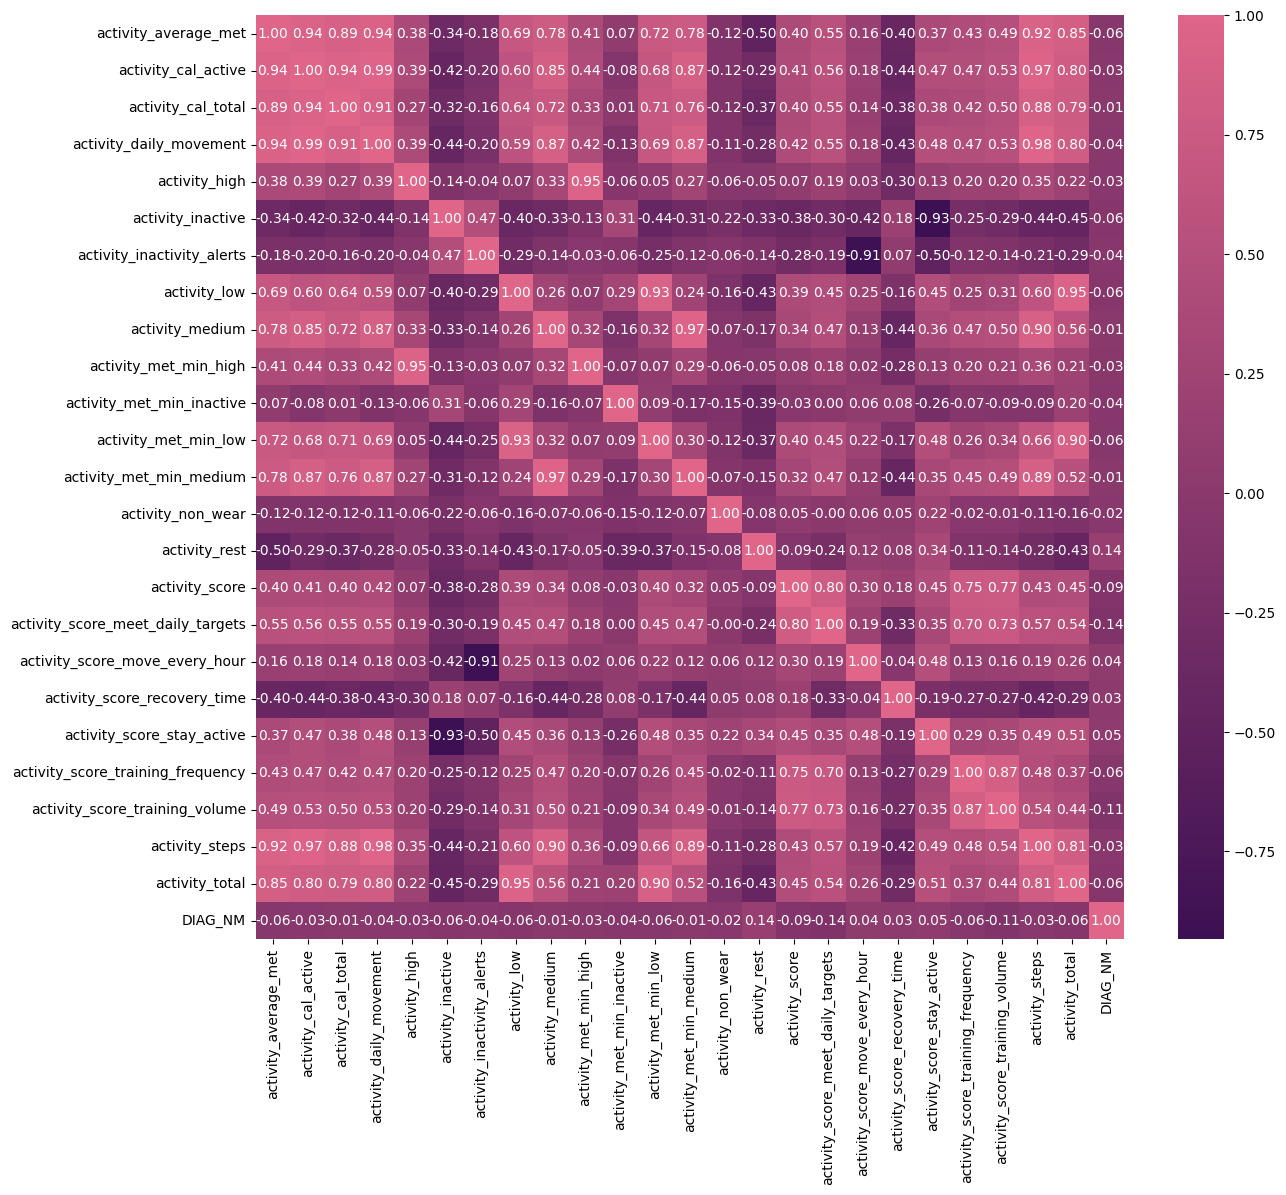

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# 변수 선택
selected_columns = activity_combine.columns[1:28]

# 상관 관계 행렬 계산
correlation_matrix = activity_combine[selected_columns].corr()

# 사용자 정의 그라데이션 컬러 맵 생성
custom_colors = ['#3C1053', '#DF6589']  # 시작 색상과 끝 색상
n_colors = 256  # 그라데이션 색상 수

# 컬러 맵 생성
color_map = LinearSegmentedColormap.from_list('custom_gradient', custom_colors, N=n_colors)

# 히트맵으로 시각화
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap=color_map, fmt=".2f")
plt.show()


# 걸음걸이 상관 관계 시각화
  중요한 변수 선택

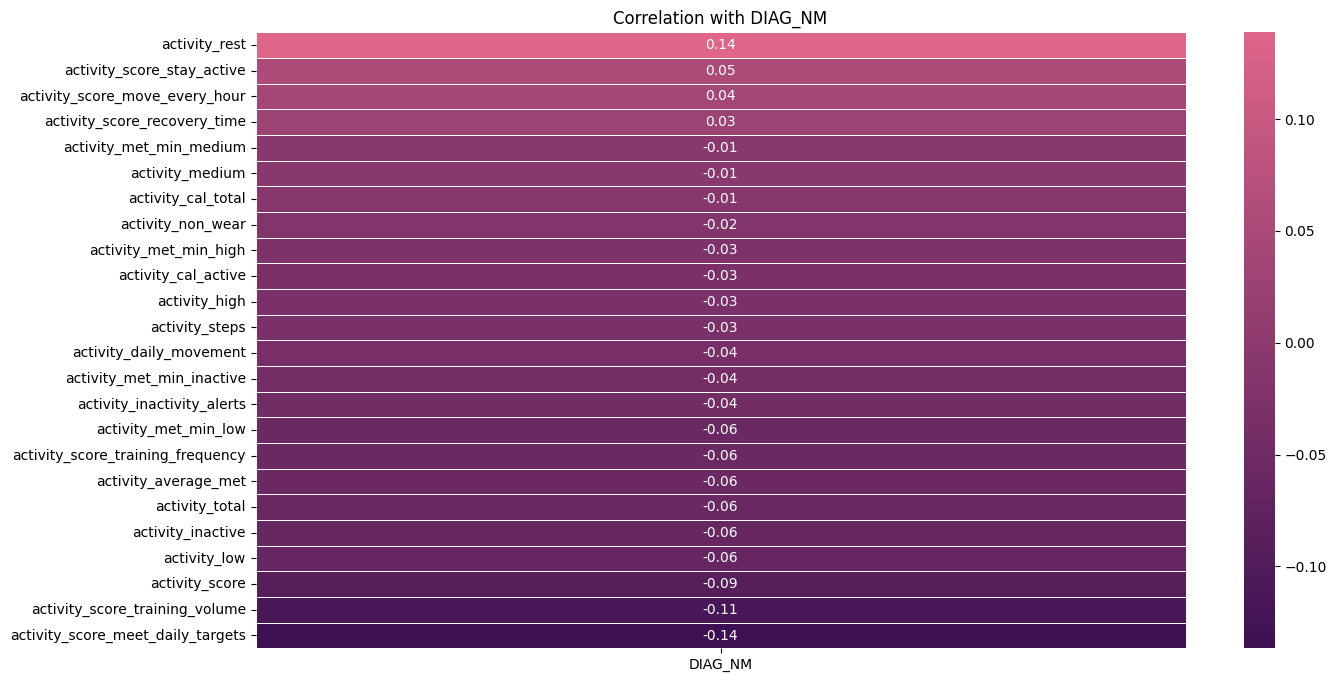

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# 중요한 변수 선택
selected_columns = activity_combine.columns[1:25]

# 상관 관계 행렬 계산
correlation_matrix = activity_combine[selected_columns].corrwith(activity_combine['DIAG_NM']).sort_values(ascending=False).to_frame()
correlation_matrix.columns = ['DIAG_NM']

# 사용자 정의 그라데이션 컬러 맵 생성
custom_colors = ['#3C1053', '#DF6589']  # 시작 색상과 끝 색상
n_colors = 256  # 그라데이션 색상 수

# 컬러 맵 생성
color_map = LinearSegmentedColormap.from_list('custom_gradient', custom_colors, N=n_colors)

# 시각화 (히트맵 크기 조절)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 8))

plt.subplot(1, 1, 1)
sns.heatmap(correlation_matrix, annot=True, cmap=color_map, linewidths=0.4, linecolor='white', fmt=".2f", annot_kws={'size': 10})
plt.title('Correlation with DIAG_NM')
plt.show()


# 상관 관계 시각화 후 걸음걸이 데이터 분포 시각화
  중요한 변수 선택

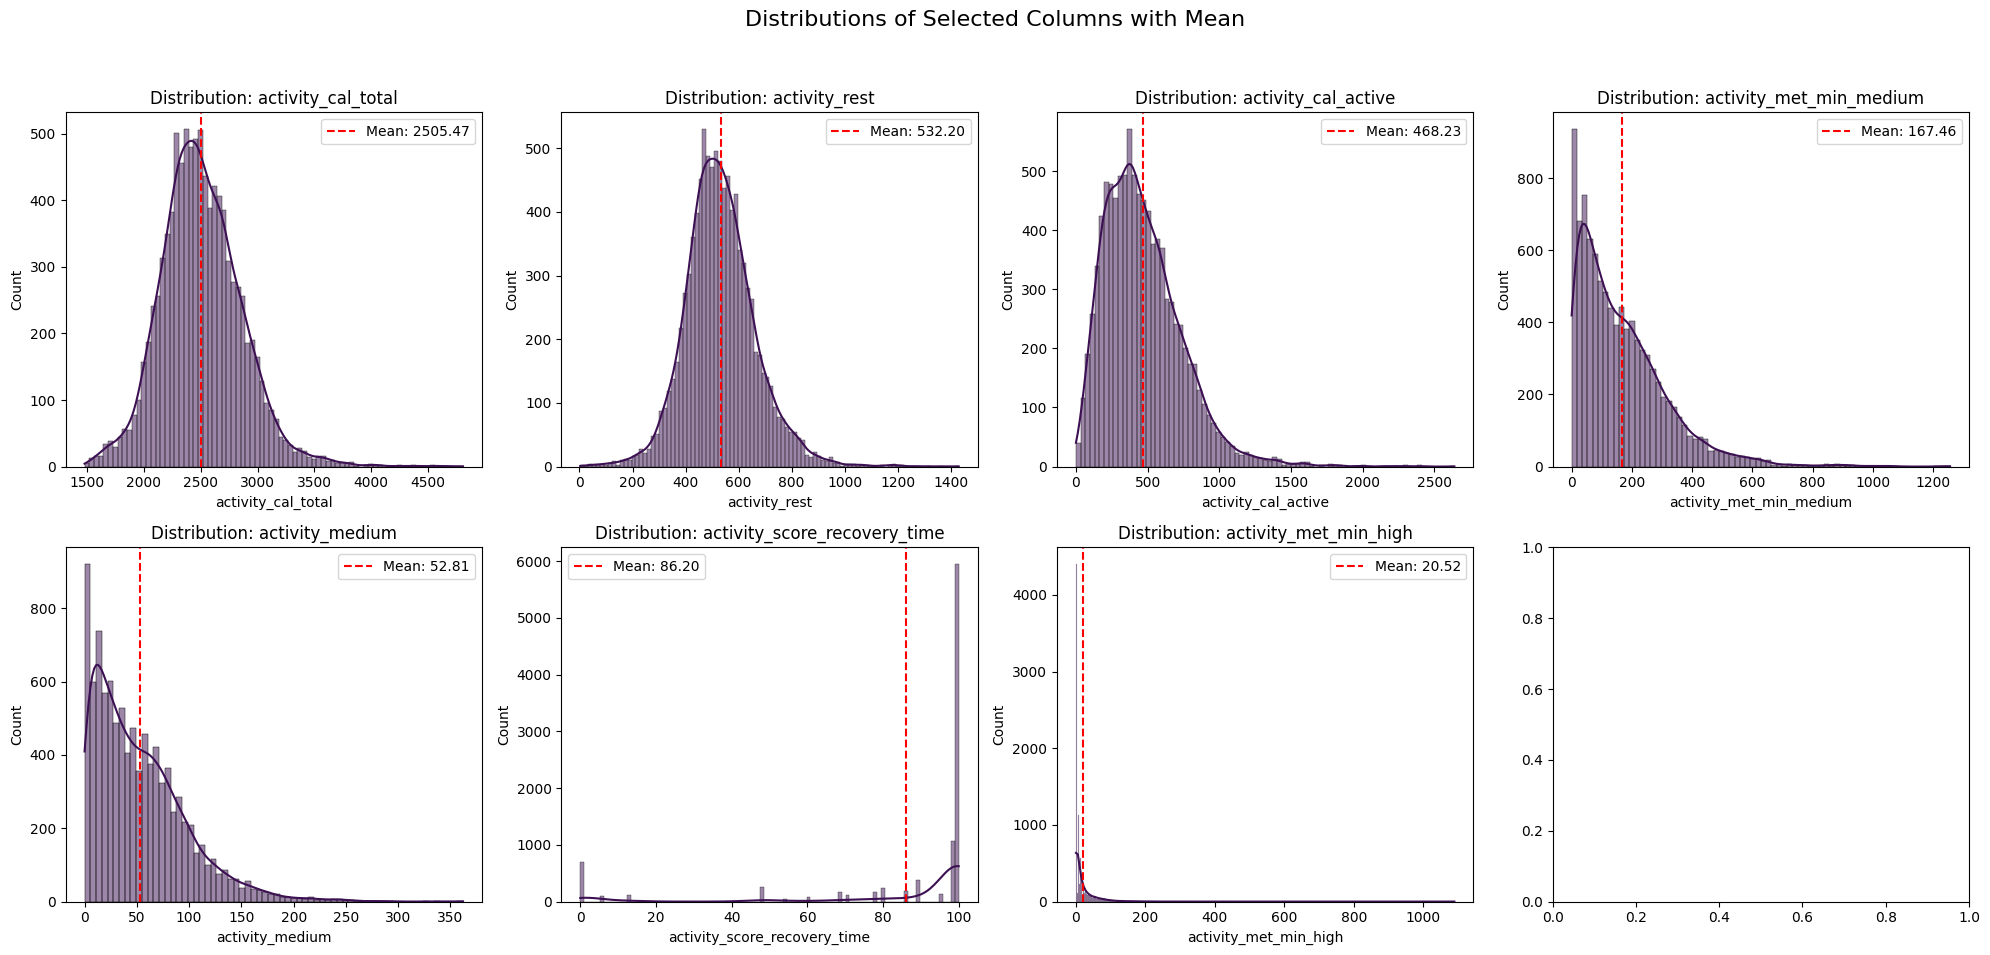

In [ ]:
selected_columns = ['activity_cal_total', 'activity_rest','activity_cal_active', 'activity_met_min_medium', 'activity_medium','activity_score_recovery_time','activity_met_min_high']
colors = ['#3C1053', '#DF6589','#68BFF5']
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
fig.suptitle('Distributions of Selected Columns with Mean', fontsize=16)

for i, column in enumerate(selected_columns):
    row, col = divmod(i, 4)
    sns.histplot(combined_activity_data[column], kde=True, color=colors[0], ax=ax[row, col])

    # Add mean line
    mean_value = combined_activity_data[column].mean()
    ax[row, col].axvline(x=mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
    ax[row, col].legend()  # Show legend with mean value

    ax[row, col].set_title(f'Distribution: {column}')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to avoid title overlap
plt.show()

# 걸음걸이 변수 선택 후 랜덤포레스트 정확도 평가

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 중요한 변수 선택 (예: activity_average_met부터 activity_low까지)
# 모든 변수 선택 (예: activity_average_met부터 activity_low까지)
selected_columns = ['activity_cal_total', 'activity_rest','activity_cal_active', 'activity_met_min_medium', 'activity_medium','activity_score_recovery_time','activity_met_min_high']
selected_columns1 = ['activity_cal_total', 'activity_rest','activity_cal_active', 'activity_met_min_medium', 'activity_medium','activity_score_recovery_time','activity_met_min_high']

train_data = combined_activity_data
val_data = val_activity

# 모델 선택 (여기서는 RandomForestClassifier를 사용)
model = RandomForestClassifier(random_state=42)

# 학습 데이터에서 특성과 레이블 분리
X_train = train_data[selected_columns]
y_train = train_data['DIAG_NM']

# 모델 학습
model.fit(X_train, y_train)

# 검증 데이터에서 특성과 레이블 분리
X_val = val_data[selected_columns1]
y_val = val_data['DIAG_NM']

# 모델 예측
y_val_pred = model.predict(X_val)

# 정확도 평가
accuracy = accuracy_score(y_val, y_val_pred)
print(f"\n모델 정확도: {accuracy:.4f}")
#7054 5621 6412 6574 6618


모델 정확도: 0.6622


# 걸음걸이 변수 전체로 랜덤포레스트 정확도 평가
중요한 변수 선택할 경우와 정확도와 비교분석

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 모든 변수 선택 (예: activity_average_met부터 activity_low까지)
selected_columns = combined_activity_data.columns[1:25]
selected_columns1 = val_activity.columns[1:25]
train_data = combined_activity_data
val_data = val_activity

# 모델 선택 (여기서는 RandomForestClassifier를 사용)
model = RandomForestClassifier(random_state=42)

# 학습 데이터에서 특성과 레이블 분리
X_train = train_data[selected_columns]
y_train = train_data['DIAG_NM']

# 모델 학습
model.fit(X_train, y_train)

# 검증 데이터에서 특성과 레이블 분리
X_val = val_data[selected_columns1]
y_val = val_data['DIAG_NM']

# 모델 예측
y_val_pred = model.predict(X_val)

# 정확도 평가
accuracy = accuracy_score(y_val, y_val_pred)
print(f"\n모델 정확도: {accuracy:.4f}")
#7054 5621 5658 5912 6388 6453 6570


모델 정확도: 0.6683


# 수면 상관 관계 시각화
중요한 변수 선택

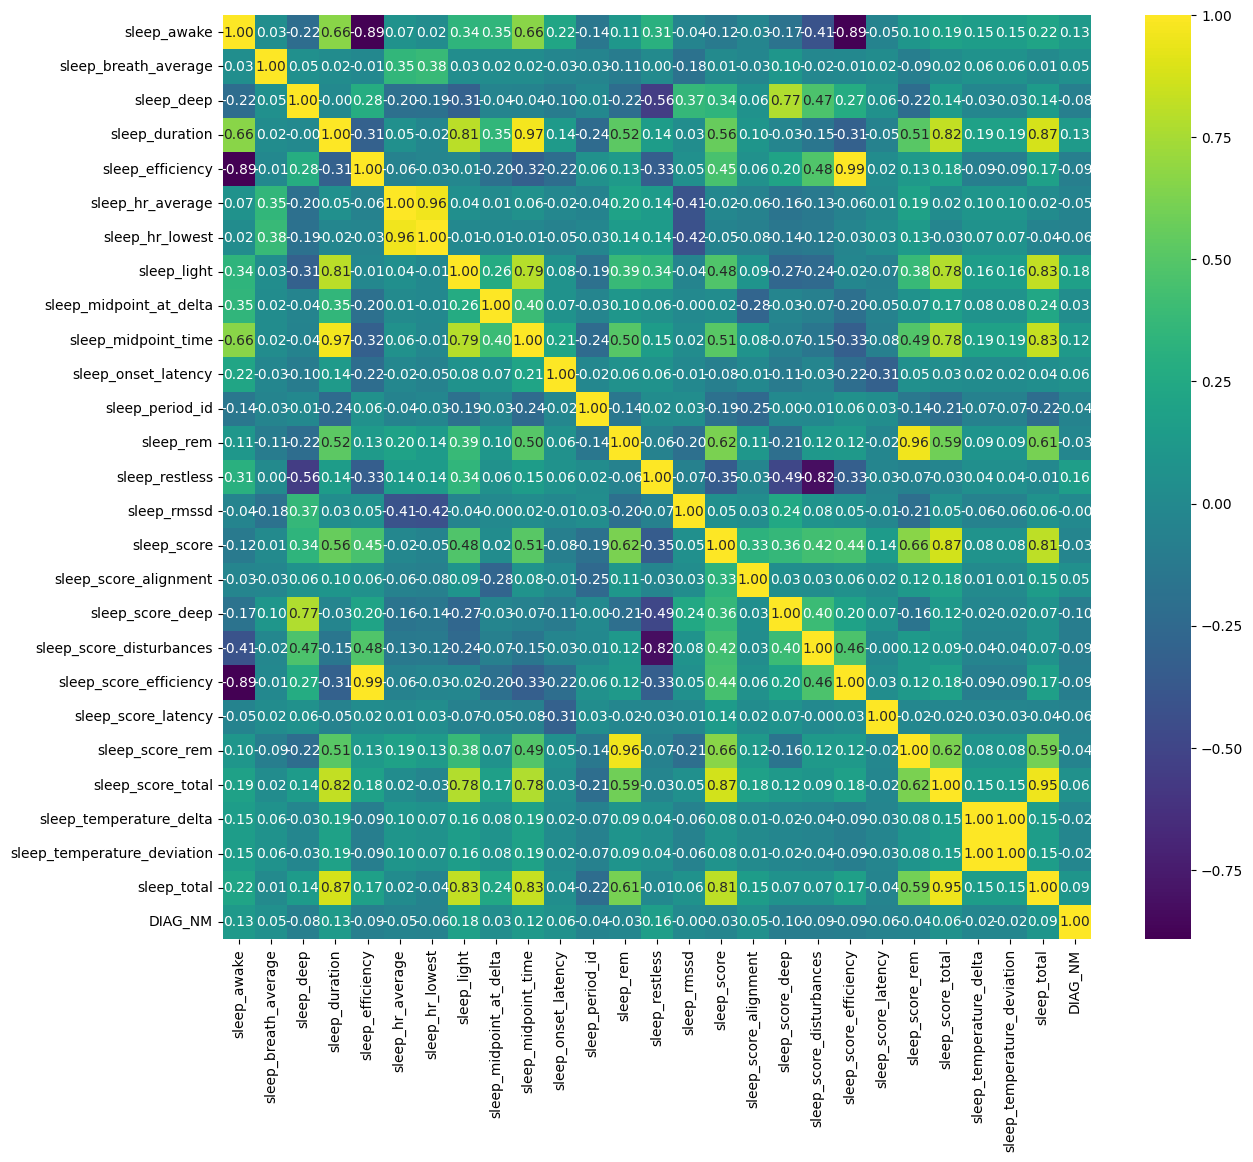

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 변수 선택
selected_columns = sleep_combine.columns[1:28]

# 상관 관계 행렬 계산
correlation_matrix = sleep_combine[selected_columns].corr()

# 내장 컬러 맵 "viridis" 사용
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.show()



# 수면 상관 관계 시각화
중요한 변수 선택

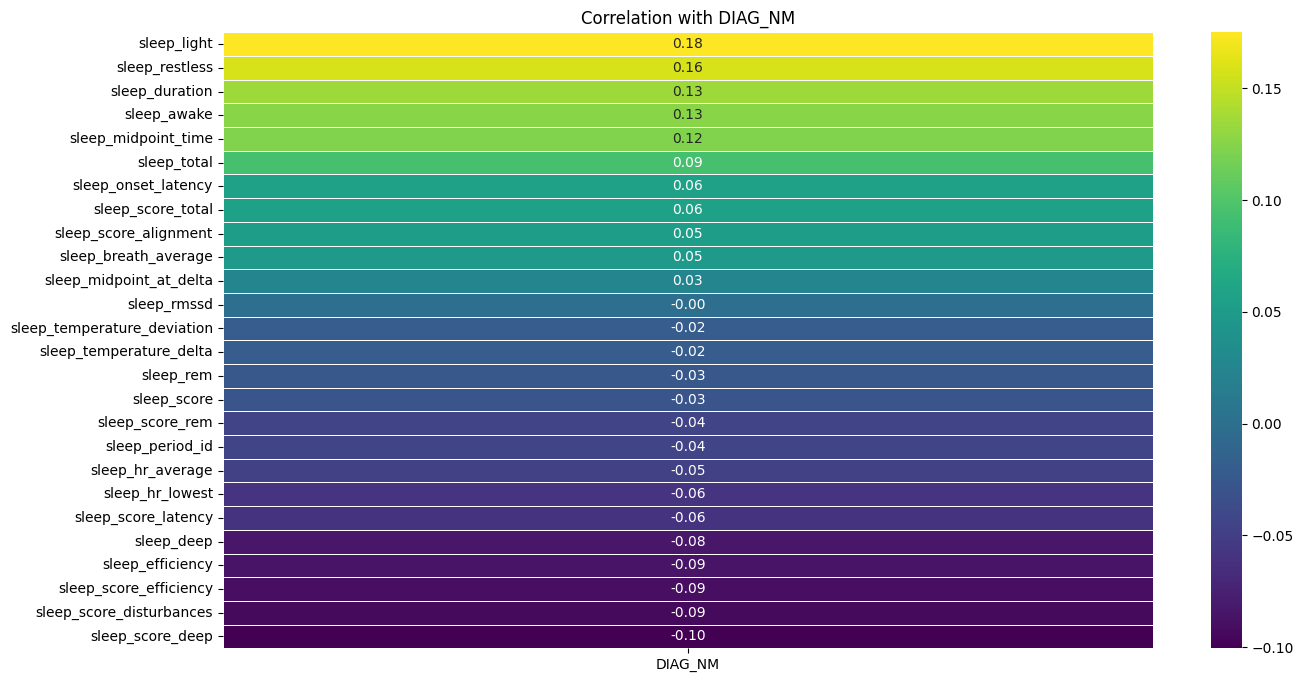

In [ ]:
# 중요한 변수 선택
selected_columns = sleep_combine.columns[1:27]

# 상관 관계 행렬 계산
correlation_matrix = sleep_combine[selected_columns].corrwith(sleep_combine['DIAG_NM']).sort_values(ascending=False).to_frame()
correlation_matrix.columns = ['DIAG_NM']

# 시각화 (히트맵 크기 조절)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 8))

plt.subplot(1, 1, 1)
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=0.4, linecolor='white', fmt=".2f", annot_kws={'size': 10})
plt.title('Correlation with DIAG_NM')
plt.show()

# 상관 관계 시각화 후 수면 데이터 분포 시각화
중요한 변수 선택

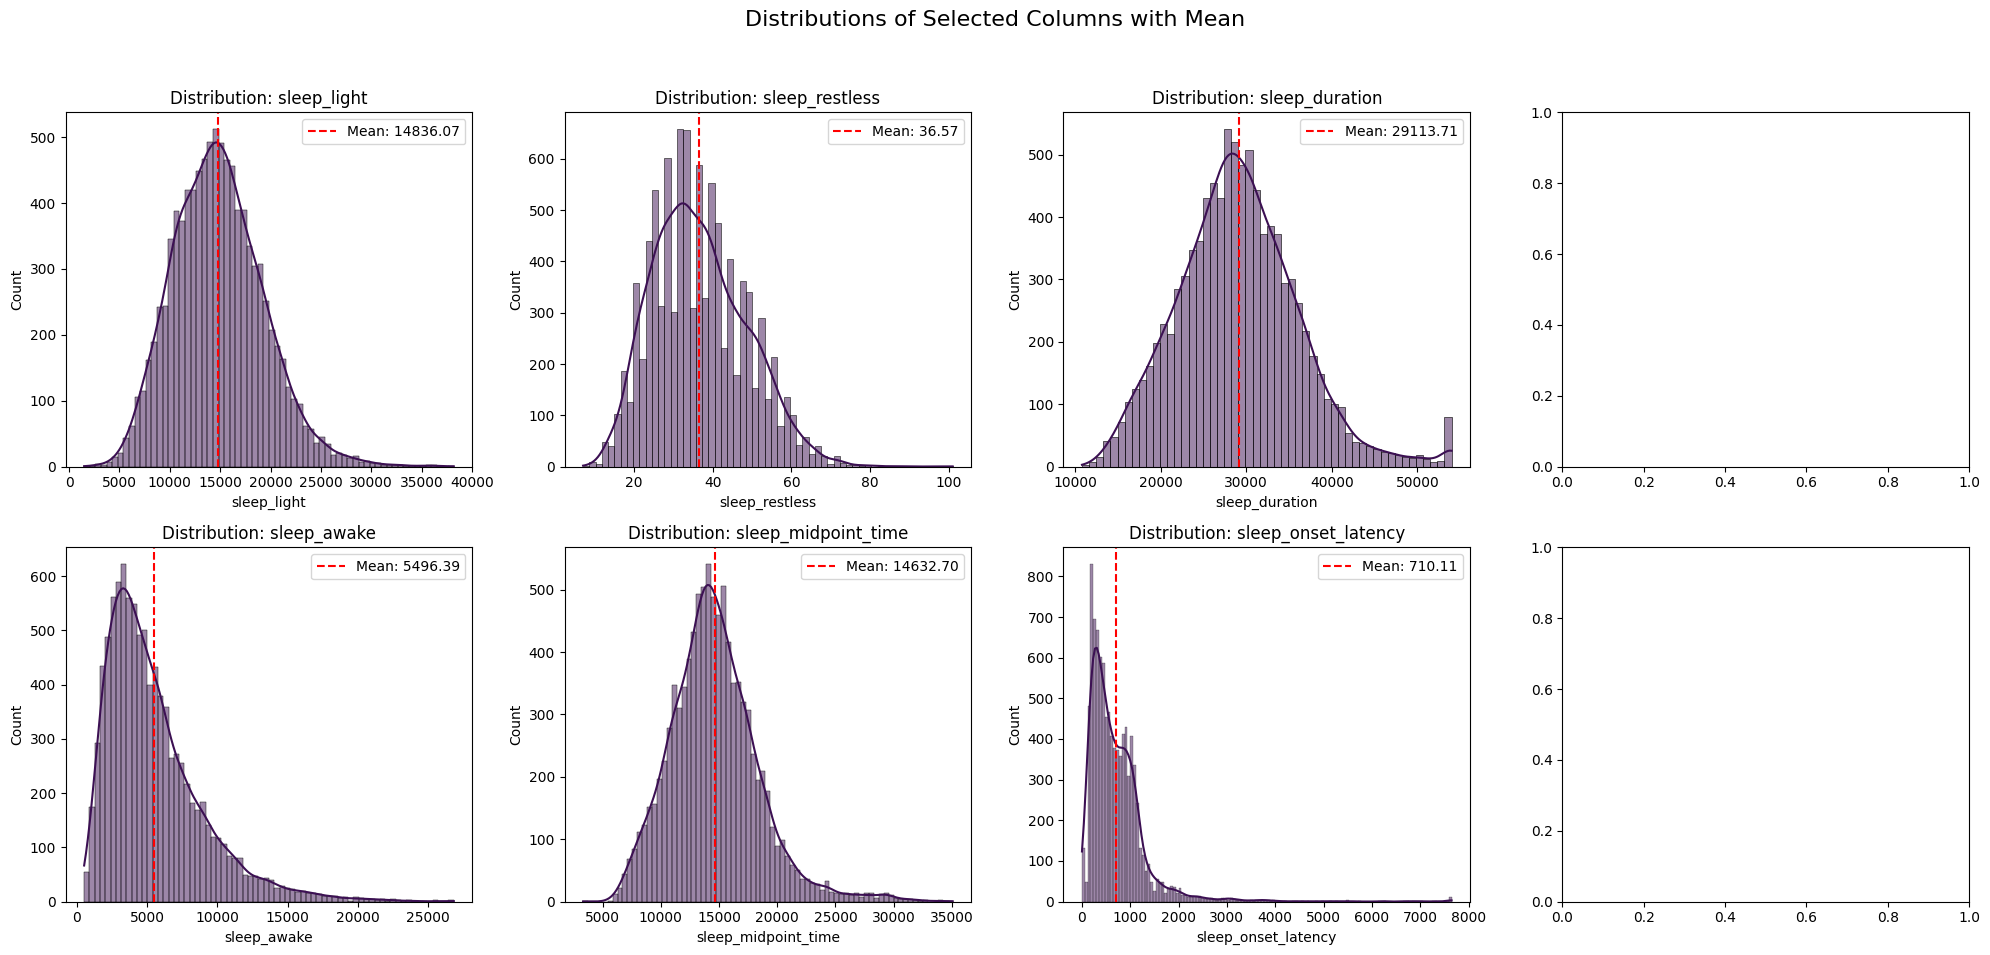

In [ ]:
selected_columns = ['sleep_light', 'sleep_restless', 'sleep_duration', 'sleep_awake','sleep_midpoint_time', 'sleep_onset_latency']
colors = ['#3C1053', '#DF6589','#68BFF5']
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
fig.suptitle('Distributions of Selected Columns with Mean', fontsize=16)

for i, column in enumerate(selected_columns):
    row, col = divmod(i, 3)
    sns.histplot(combined_sleep_data[column], kde=True, color=colors[0], ax=ax[row, col])

    # Add mean line
    mean_value = combined_sleep_data[column].mean()
    ax[row, col].axvline(x=mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
    ax[row, col].legend()  # Show legend with mean value

    ax[row, col].set_title(f'Distribution: {column}')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to avoid title overlap
plt.show()

# 수면 중요한 변수로 랜덤포레스트 정확도 평가

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 중요한 변수 선택 (예: activity_average_met부터 activity_low까지)

selected_columns = ['activity_cal_total', 'activity_rest','activity_cal_active', 'activity_met_min_medium', 'activity_medium','activity_score_recovery_time','activity_met_min_high','sleep_light', 'sleep_restless', 'sleep_duration', 'sleep_awake','sleep_midpoint_time', 'sleep_onset_latency']
selected_columns1 = ['activity_cal_total', 'activity_rest','activity_cal_active', 'activity_met_min_medium', 'activity_medium','activity_score_recovery_time','activity_met_min_high','sleep_light', 'sleep_restless', 'sleep_duration', 'sleep_awake','sleep_midpoint_time', 'sleep_onset_latency']

train_data = all_train_combine
val_data = all_test_combine

# 모델 선택 (여기서는 RandomForestClassifier를 사용)
model = RandomForestClassifier(random_state=42)

# 학습 데이터에서 특성과 레이블 분리
X_train = train_data[selected_columns]
y_train = train_data['DIAG_NM']

# 모델 학습
model.fit(X_train, y_train)

# 검증 데이터에서 특성과 레이블 분리
X_val = val_data[selected_columns1]
y_val = val_data['DIAG_NM']

# 모델 예측
y_val_pred = model.predict(X_val)

# 정확도 평가
accuracy = accuracy_score(y_val, y_val_pred)
print(f"\n모델 정확도: {accuracy:.4f}")
#6679 6921 6885


모델 정확도: 0.7127


# 수면 변수 전체로 랜덤포레스트 정확도 평가
중요한 변수 선택할 경우와 정확도와 비교분석

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 중요한 변수 선택 (예: activity_average_met부터 activity_low까지)
selected_columns = all_train_combine.columns[1:27]
selected_columns1 = all_test_combine.columns[1:27]

train_data = all_train_combine
val_data = all_test_combine

# 모델 선택 (여기서는 RandomForestClassifier를 사용)
model = RandomForestClassifier(random_state=42)

# 학습 데이터에서 특성과 레이블 분리
X_train = train_data[selected_columns]
y_train = train_data['DIAG_NM']

# 모델 학습
model.fit(X_train, y_train)

# 검증 데이터에서 특성과 레이블 분리
X_val = val_data[selected_columns1]
y_val = val_data['DIAG_NM']

# 모델 예측
y_val_pred = model.predict(X_val)

# 정확도 평가
accuracy = accuracy_score(y_val, y_val_pred)
print(f"\n모델 정확도: {accuracy:.4f}")
#6679 6921 6885


모델 정확도: 0.6630


In [ ]:
all_test_combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2478 entries, 0 to 2477
Data columns (total 52 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   EMAIL                              2478 non-null   object 
 1   activity_average_met               2478 non-null   float64
 2   activity_cal_active                2478 non-null   int64  
 3   activity_cal_total                 2478 non-null   int64  
 4   activity_daily_movement            2478 non-null   int64  
 5   activity_high                      2478 non-null   int64  
 6   activity_inactive                  2478 non-null   int64  
 7   activity_inactivity_alerts         2478 non-null   int64  
 8   activity_low                       2478 non-null   int64  
 9   activity_medium                    2478 non-null   int64  
 10  activity_met_min_high              2478 non-null   int64  
 11  activity_met_min_inactive          2478 non-null   int64

# 치매 진단 레이블 시각화
정상(0), 경도 인식 장애(1), 치매(2) 데이터 분포 시각화

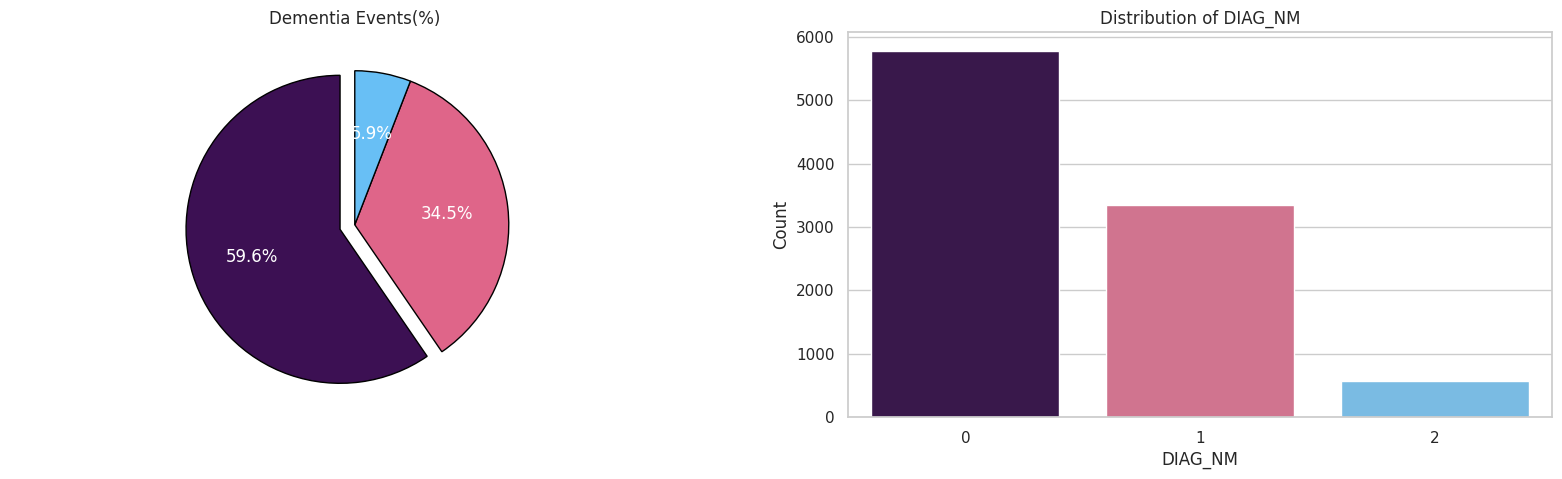

5781


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'stroke' is the column name in your DataFrame for the stroke information
l = list(all_train_combine['DIAG_NM'].value_counts())
circle = [l[0] / sum(l) * 100, l[1] / sum(l) * 100]
# Colors
colors = ['#3C1053', '#DF6589', '#68BFF5']
df1 = all_train_combine.copy(deep=True)

all_train_combine['DIAG_NM_Label'] = all_train_combine['DIAG_NM'].map({0: 'No dementia Suffered', 1: 'Dementia little Suffered', 2: 'Dementia Suffered'})

# Pie chart
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# Calculate percentages for each category
l = list(all_train_combine['DIAG_NM_Label'].value_counts())
circle = [l[0] / sum(l) * 100, l[1] / sum(l) * 100, l[2] / sum(l) * 100]



# Pie chart
plt.subplot(1, 2, 1)
plt.pie(circle, labels=['No dementia Suffered', 'Dementia little Suffered', 'Dementia Suffered'], autopct='%1.1f%%', startangle=90,
        explode=(0.1, 0, 0), colors=colors, wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True},
        textprops={'color': 'white'})  # Set text color to white
plt.title('Dementia Events(%)')

# Assuming 'DIAG_NM' is the column name in your DataFrame for the diagnosis information
sns.set(style="whitegrid")  # Set the style for seaborn

# Countplot
plt.subplot(1, 2, 2)
sns.countplot(x='DIAG_NM', data=all_train_combine, palette=colors)
plt.title('Distribution of DIAG_NM')
plt.xlabel('DIAG_NM')
plt.ylabel('Count')

plt.show()

print(len(all_train_combine[all_train_combine['DIAG_NM'] == 0]))
# 5781 3353 571

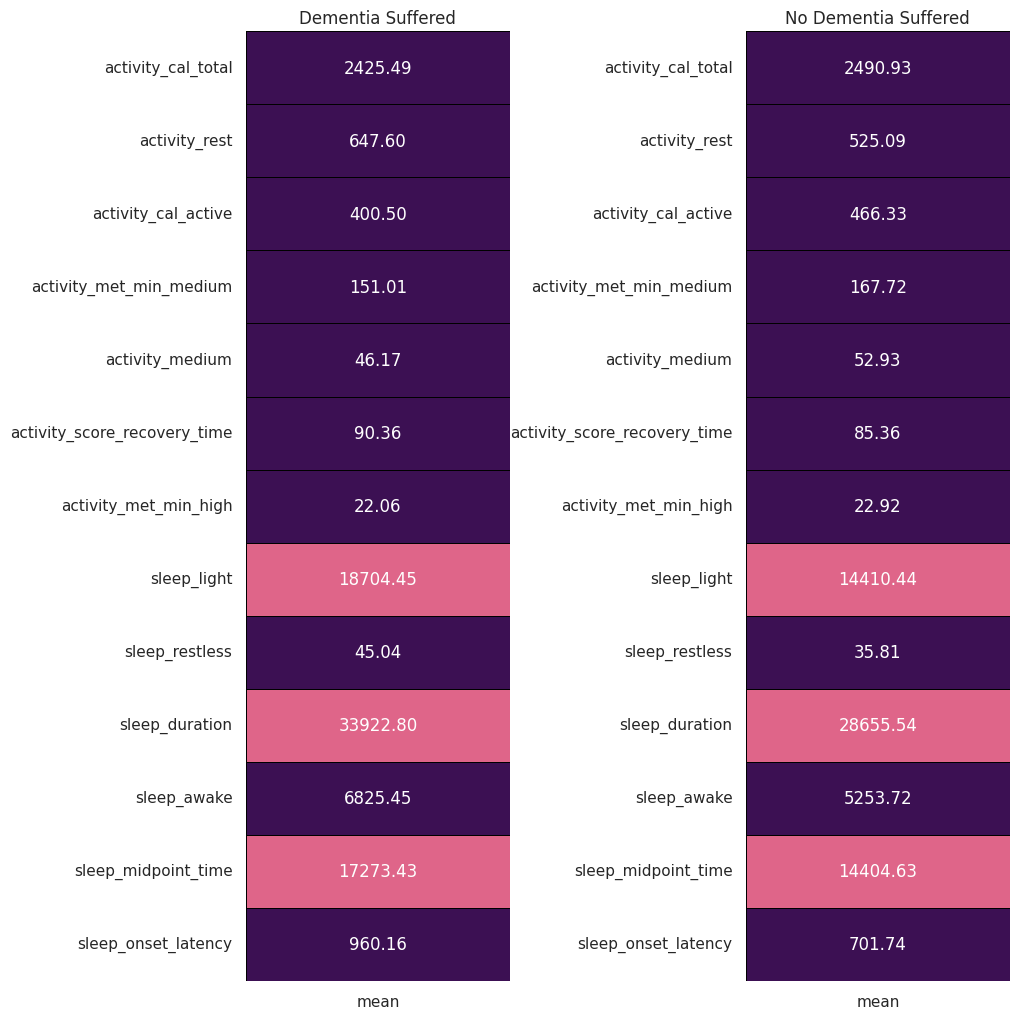

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 선택한 컬럼
selected_columns1 = ['activity_cal_total', 'activity_rest', 'activity_cal_active', 'activity_met_min_medium',
                     'activity_medium', 'activity_score_recovery_time', 'activity_met_min_high',
                     'sleep_light', 'sleep_restless', 'sleep_duration', 'sleep_awake',
                     'sleep_midpoint_time', 'sleep_onset_latency']

colors = ['#3C1053', '#DF6589']

# Demetia 그룹의 통계량
dementia = all_train_combine[all_train_combine['DIAG_NM'] == 2][selected_columns1].describe().T

# No Dementia 그룹의 통계량
no_dementia = all_train_combine[all_train_combine['DIAG_NM'] == 0][selected_columns1].describe().T

# 그래프 그리기
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))

plt.subplot(1, 2, 1)
sns.heatmap(dementia[['mean']], annot=True, cmap=colors, linewidths=0.4, linecolor='black', cbar=False, fmt='.2f')
plt.title('Dementia Suffered')

plt.subplot(1, 2, 2)
sns.heatmap(no_dementia[['mean']], annot=True, cmap=colors, linewidths=0.4, linecolor='black', cbar=False, fmt='.2f')
plt.title('No Dementia Suffered')

fig.tight_layout(pad=0)
plt.show()


# 결측치 확인

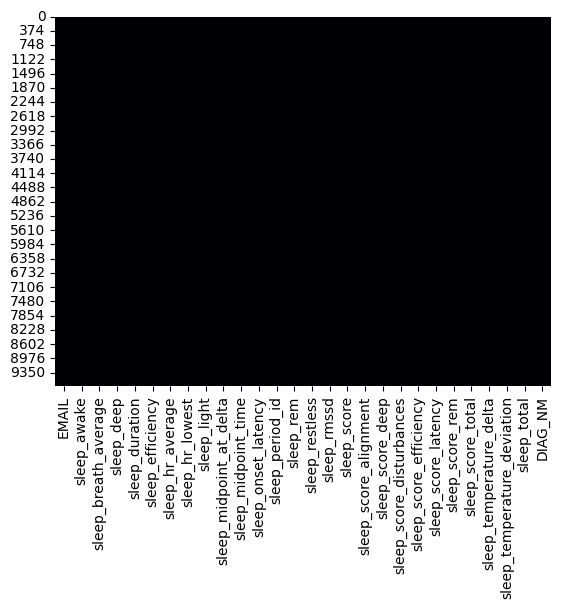

In [ ]:
# 히트맵으로 결측치 변수 있는지 확인
sns.heatmap(combined_sleep_data.isnull(),cmap = 'magma',cbar = False);

# 걸음걸이 중요한 변수와 각 치매 레이블 평균 시각화

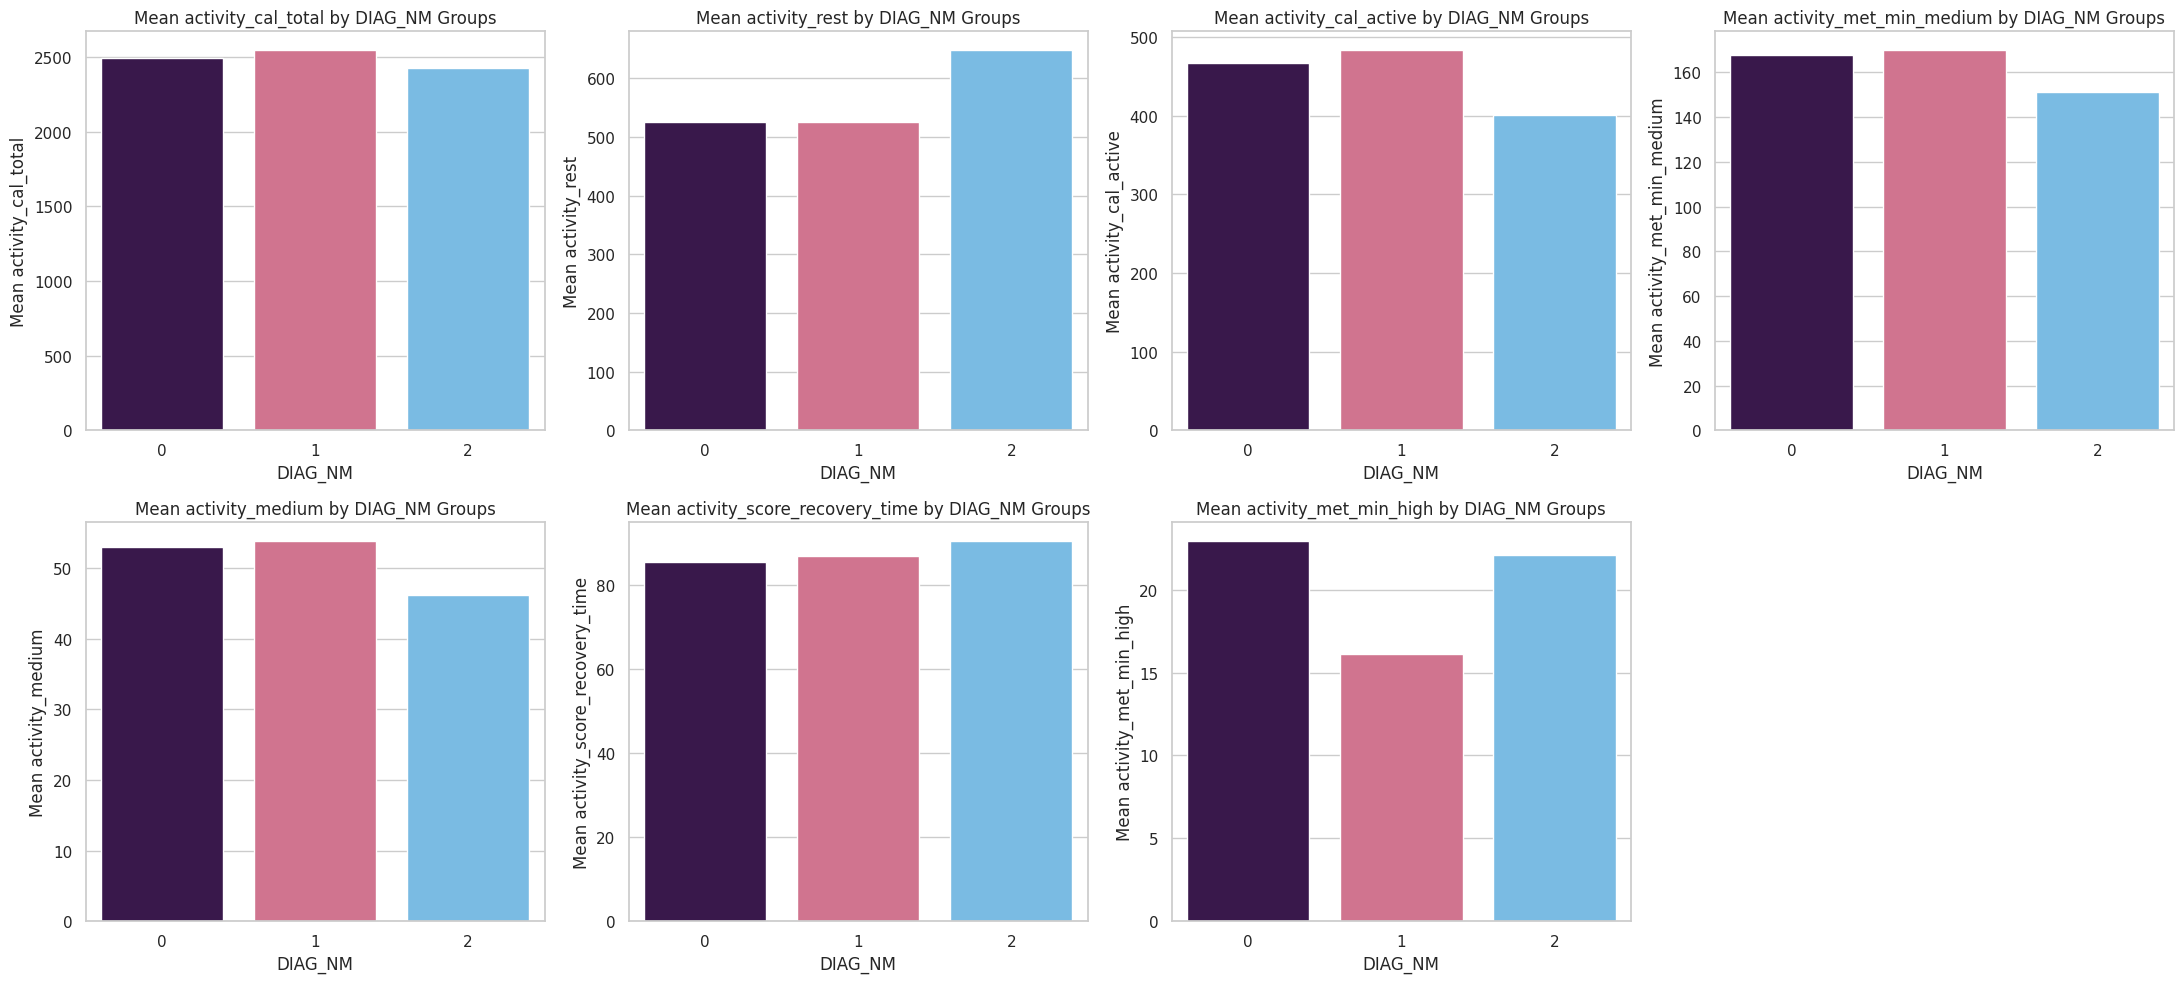

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 선택한 13개의 컬럼
selected_columns = ['activity_cal_total', 'activity_rest', 'activity_cal_active', 'activity_met_min_medium',
                    'activity_medium', 'activity_score_recovery_time', 'activity_met_min_high']

# Colors
colors = ['#3C1053', '#DF6589', '#68BFF5']

# 그룹별 평균 계산
grouped_means = all_train_combine.groupby('DIAG_NM')[selected_columns].mean().reset_index()

# 그래프 그리기
plt.figure(figsize=(22, 10))

for i, column in enumerate(selected_columns):
    plt.subplot(2, 4, i + 1)  # 4x4 서브플롯으로 조절
    sns.barplot(x='DIAG_NM', y=column, data=grouped_means, palette=colors)
    plt.title(f'Mean {column} by DIAG_NM Groups')
    plt.xlabel('DIAG_NM')
    plt.ylabel(f'Mean {column}')

# 레이아웃 조절
plt.tight_layout()
plt.show()



# 수면 중요한 변수와 각 치매 레이블 평균 시각화

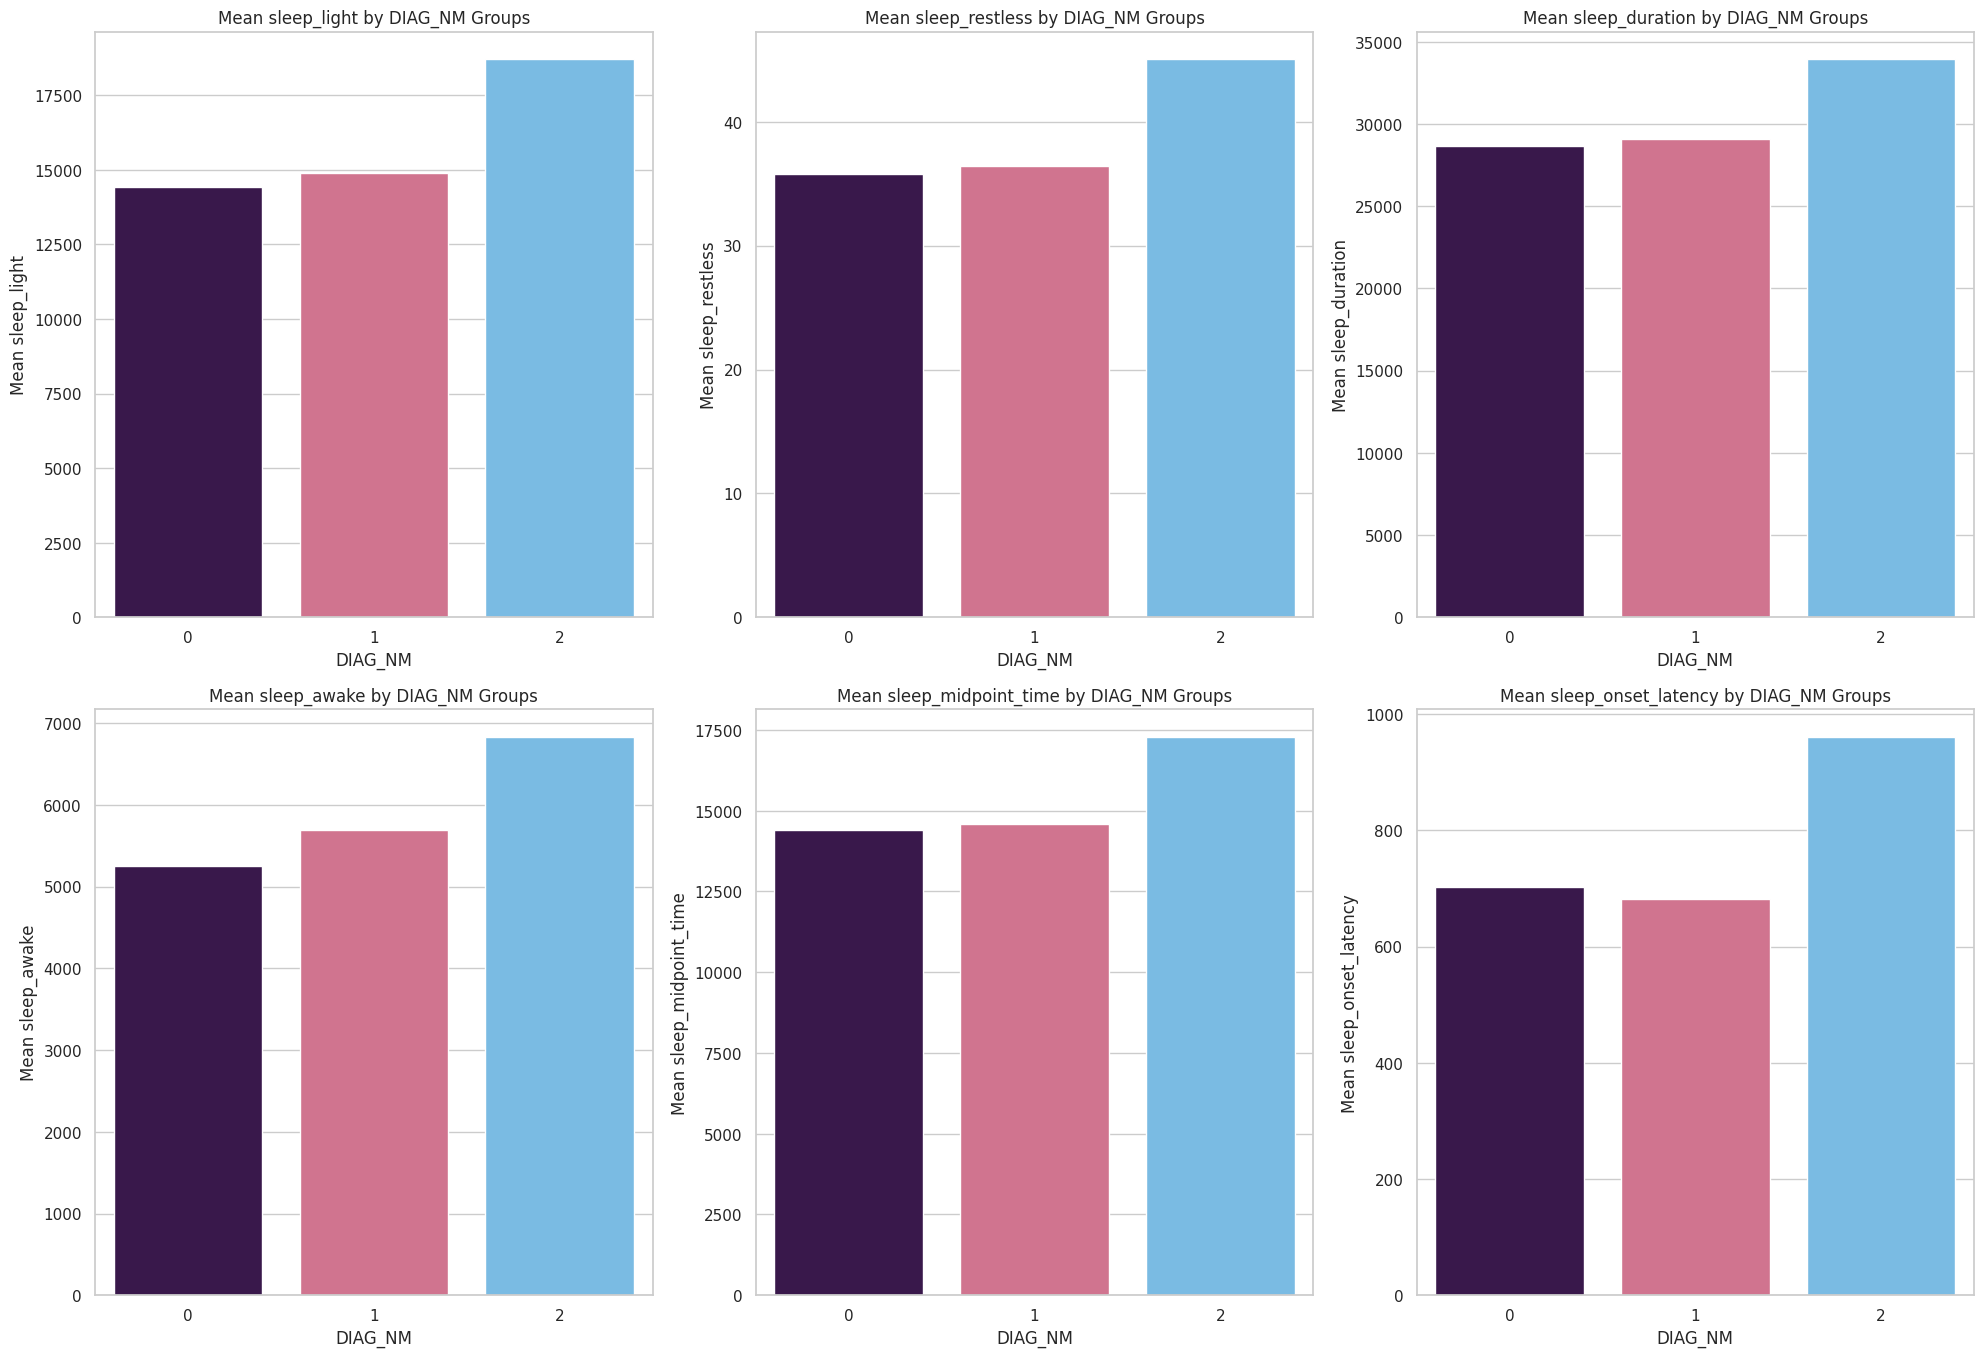

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 선택한 13개의 컬럼
selected_columns = ['sleep_light', 'sleep_restless', 'sleep_duration', 'sleep_awake',
                    'sleep_midpoint_time', 'sleep_onset_latency']

# Colors
colors = ['#3C1053', '#DF6589', '#68BFF5']

# 그룹별 평균 계산
grouped_means = all_train_combine.groupby('DIAG_NM')[selected_columns].mean().reset_index()

# 그래프 그리기
plt.figure(figsize=(20, 20))

for i, column in enumerate(selected_columns):
    plt.subplot(3, 3, i + 1)  # 4x4 서브플롯으로 조절
    sns.barplot(x='DIAG_NM', y=column, data=grouped_means, palette=colors)
    plt.title(f'Mean {column} by DIAG_NM Groups')
    plt.xlabel('DIAG_NM')
    plt.ylabel(f'Mean {column}')

# 레이아웃 조절
plt.tight_layout()
plt.show()

# 모델 학습 및 성능 평가  

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
# 중요한 변수 선택 (예: activity_average_met부터 activity_low까지)
selected_columns = ['sleep_light', 'sleep_restless', 'sleep_duration', 'sleep_midpoint_time', 'sleep_awake', 'sleep_total', 'sleep_score_total', 'sleep_onset_latency']
selected_columns1 = ['sleep_light', 'sleep_restless', 'sleep_duration', 'sleep_midpoint_time', 'sleep_awake', 'sleep_total', 'sleep_score_total', 'sleep_onset_latency']

train_data = combined_sleep_data
val_data = val_sleep

# 모델 선택 (여기서는 RandomForestClassifier를 사용)
model = RandomForestClassifier(random_state=42)

# 학습 데이터에서 특성과 레이블 분리
X_train = train_data[selected_columns]
y_train = train_data['DIAG_NM']

# 모델 학습
model.fit(X_train, y_train)

# 검증 데이터에서 특성과 레이블 분리
X_val = val_data[selected_columns1]
y_val = val_data['DIAG_NM']

# 모델 예측
y_val_pred = model.predict(X_val)

# 정확도 평가
accuracy = accuracy_score(y_val, y_val_pred)
print(f"\n모델 정확도: {accuracy:.4f}")
# 혼동 행렬 계산
conf_matrix = confusion_matrix(y_val, y_val_pred)

# 정확도 계산
accuracy = accuracy_score(y_val, y_val_pred)
print(f"\n모델 정확도: {accuracy:.4f}")

# 민감도 (Sensitivity) 계산
sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])
print(f"\n민감도 (Sensitivity): {sensitivity:.4f}")

# 특이도 (Specificity) 계산
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
print(f"\n특이도 (Specificity): {specificity:.4f}")


모델 정확도: 0.6921

모델 정확도: 0.6921

민감도 (Sensitivity): 0.1336

특이도 (Specificity): 0.8491


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# 중요한 변수 선택 (예: activity_average_met부터 activity_low까지)
selected_columns = ['activity_cal_total', 'activity_rest','activity_cal_active', 'activity_met_min_medium', 'activity_medium','activity_score_recovery_time','activity_met_min_high','sleep_light', 'sleep_restless', 'sleep_duration', 'sleep_awake','sleep_midpoint_time', 'sleep_onset_latency']
selected_columns1 = ['activity_cal_total', 'activity_rest','activity_cal_active', 'activity_met_min_medium', 'activity_medium','activity_score_recovery_time','activity_met_min_high','sleep_light', 'sleep_restless', 'sleep_duration', 'sleep_awake','sleep_midpoint_time', 'sleep_onset_latency']

train_data = all_train_combine
val_data = all_test_combine

# 모델 선택 (여기서는 RandomForestClassifier를 사용)
model = RandomForestClassifier(random_state=42)

# 학습 데이터에서 특성과 레이블 분리
X_train = train_data[selected_columns]
y_train = train_data['DIAG_NM']

# 모델 학습
model.fit(X_train, y_train)

# 검증 데이터에서 특성과 레이블 분리
X_val = val_data[selected_columns1]
y_val = val_data['DIAG_NM']

# 모델 예측
y_val_pred = model.predict(X_val)

# 정확도 평가
accuracy = accuracy_score(y_val, y_val_pred)
print(f"\n모델 정확도: {accuracy:.4f}")
# 혼동 행렬 계산
conf_matrix = confusion_matrix(y_val, y_val_pred)

# 정확도 계산
accuracy = accuracy_score(y_val, y_val_pred)
print(f"\n모델 정확도: {accuracy:.4f}")

# 민감도 (Sensitivity) 계산
sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])
print(f"\n민감도 (Sensitivity): {sensitivity:.4f}")

# 특이도 (Specificity) 계산
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
print(f"\n특이도 (Specificity): {specificity:.4f}")


모델 정확도: 0.7127

모델 정확도: 0.7127

민감도 (Sensitivity): 0.1396

특이도 (Specificity): 0.8610


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
# 중요한 변수 선택 (예: activity_average_met부터 activity_low까지)
selected_columns = ['activity_cal_total', 'activity_rest','activity_cal_active', 'activity_met_min_medium', 'activity_medium','activity_score_recovery_time','activity_met_min_high','sleep_light', 'sleep_restless', 'sleep_duration', 'sleep_awake','sleep_midpoint_time', 'sleep_onset_latency']
selected_columns1 = ['activity_cal_total', 'activity_rest','activity_cal_active', 'activity_met_min_medium', 'activity_medium','activity_score_recovery_time','activity_met_min_high','sleep_light', 'sleep_restless', 'sleep_duration', 'sleep_awake','sleep_midpoint_time', 'sleep_onset_latency']



train_data = all_train_combine
val_data = all_test_combine

# 모델 선택 (여기서는 RandomForestClassifier를 사용)
model_r = RandomForestClassifier(random_state=42)

# 학습 데이터에서 특성과 레이블 분리
X_train = train_data[selected_columns]
y_train = train_data['DIAG_NM']

# 모델 학습
model_r.fit(X_train, y_train)

# 검증 데이터에서 특성과 레이블 분리
X_val = val_data[selected_columns1]
y_val = val_data['DIAG_NM']



In [ ]:
from sklearn.metrics import classification_report

# 랜덤 포레스트 모델을 사용한 분류
y_val_pred_rf = model_r.predict(X_val)

# classification_report를 통한 세부적인 평가
class_report_rf = classification_report(y_val, y_val_pred_rf)
print("\nRandom Forest Classification Report:\n", class_report_rf)



Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83      1956
           1       0.13      0.14      0.14       308
           2       0.88      0.21      0.33       214

    accuracy                           0.71      2478
   macro avg       0.60      0.40      0.43      2478
weighted avg       0.72      0.71      0.70      2478



# 랜덤 포레스트로 특정 중요도 기준으로 5가지 중요한 변수 시각화

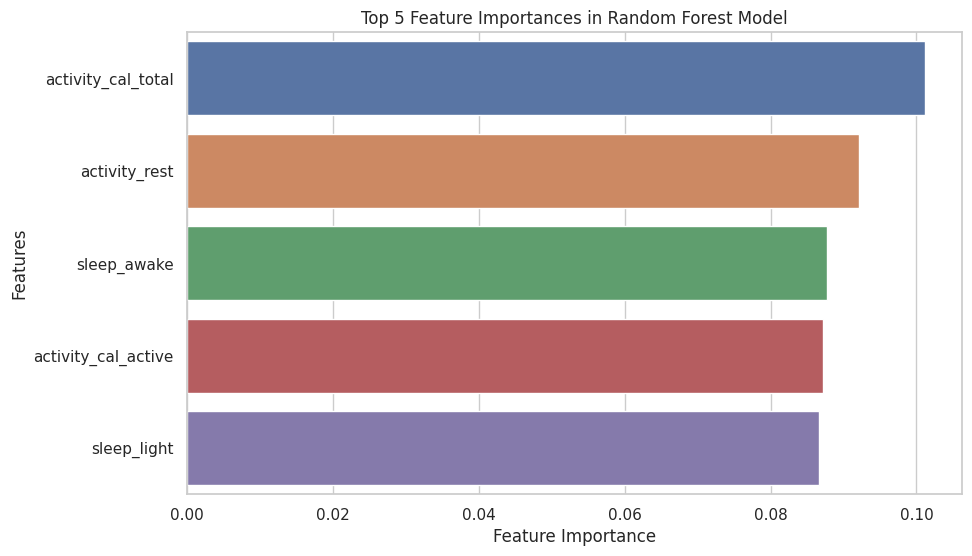

In [ ]:
# 랜덤 포레스트 모델 학습
model_r.fit(X_train, y_train)

# 특성 중요도 추출
feature_importances = model_r.feature_importances_

# 특성 중요도를 기준으로 내림차순 정렬한 인덱스
sorted_indices = np.argsort(feature_importances)[::-1]

# 상위 5개의 특성 출력
top_n = 5
top_features = X_train.columns[sorted_indices[:top_n]]

# 특성 중요도 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[sorted_indices[:top_n]], y=top_features)
plt.title('Top 5 Feature Importances in Random Forest Model')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


# 중요한 변수 선택 (예: activity_average_met부터 activity_low까지)
selected_columns = ['activity_cal_total', 'activity_rest','activity_cal_active', 'activity_met_min_medium', 'activity_medium','activity_score_recovery_time','activity_met_min_high','sleep_light', 'sleep_restless', 'sleep_duration', 'sleep_awake','sleep_midpoint_time', 'sleep_onset_latency']
selected_columns1 = ['activity_cal_total', 'activity_rest','activity_cal_active', 'activity_met_min_medium', 'activity_medium','activity_score_recovery_time','activity_met_min_high','sleep_light', 'sleep_restless', 'sleep_duration', 'sleep_awake','sleep_midpoint_time', 'sleep_onset_latency']

train_data = all_train_combine
val_data = all_test_combine

# 모델 선택 (여기서는 RandomForestClassifier를 사용)
model_S = make_pipeline(StandardScaler(), SVC(random_state=42))

# 학습 데이터에서 특성과 레이블 분리
X_train = train_data[selected_columns]
y_train = train_data['DIAG_NM']

# 모델 학습
model_S.fit(X_train, y_train)

# 검증 데이터에서 특성과 레이블 분리
X_val = val_data[selected_columns1]
y_val = val_data['DIAG_NM']



In [ ]:
from sklearn.metrics import classification_report

# 모델 예측
y_val_pred = model_S.predict(X_val)

# classification_report를 통한 세부적인 평가
class_report = classification_report(y_val, y_val_pred)
print("\nClassification Report:\n", class_report)



Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.92      0.86      1956
           1       0.16      0.11      0.13       308
           2       0.97      0.14      0.24       214

    accuracy                           0.75      2478
   macro avg       0.64      0.39      0.41      2478
weighted avg       0.74      0.75      0.71      2478



# 새로운 데이터 입력하여 예측 잘 수행하는지 평가

In [ ]:

new_data = pd.DataFrame({
    'activity_cal_total':[2251,3000,3000],
    'activity_rest':[519,464,500],
    'activity_cal_active' : [196,145,118],
    'activity_met_min_medium':[20,18,19],
    'activity_medium':[6,9,6],
    'activity_score_recovery_time':[100,100,100],
    'activity_met_min_high':[0,0,0],
    'sleep_light': [15330, 11820, 12360],
    'sleep_restless': [24, 20, 35],
    'sleep_duration': [37920, 28680, 32040],
    'sleep_midpoint_time': [17820, 12990, 18390],
    'sleep_awake': [8700, 6570, 10530],
    'sleep_onset_latency': [630, 930, 330]
})

# 모델을 사용하여 새로운 데이터에 대한 예측 수행
new_data_array = new_data.to_numpy()  # DataFrame을 numpy 배열로 변환
y_test_pred = model_r.predict(new_data_array)
# 예측 결과 출력
print("\n예측 결과:")
print(y_test_pred)



예측 결과:
[1 1 1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# 각 치매 레이블 별 예측 확률

In [ ]:
# 모델을 사용하여 새로운 데이터에 대한 예측 확률 계산
new_data_selected = new_data[selected_columns]
y_test_pred_proba = model_r.predict_proba(new_data_selected)

# 예측 확률 결과 출력
print("\n예측 확률:")
print(y_test_pred_proba)


예측 확률:
[[0.12 0.85 0.03]
 [0.41 0.58 0.01]
 [0.38 0.58 0.04]]


#  LSTM으로 모델 학습 진행
레포트와 PPT에는 추가하지 않았음

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# combined_sleep_data 및 val_sleep이 DataFrame인 것으로 가정합니다.

# 중요한 변수 선택 (예: activity_average_met부터 activity_low까지)
selected_columns = ['activity_cal_total', 'activity_rest','activity_cal_active', 'activity_met_min_medium', 'activity_medium','activity_score_recovery_time','activity_met_min_high','sleep_light', 'sleep_restless', 'sleep_duration', 'sleep_awake','sleep_midpoint_time', 'sleep_onset_latency']
selected_columns1 = ['activity_cal_total', 'activity_rest','activity_cal_active', 'activity_met_min_medium', 'activity_medium','activity_score_recovery_time','activity_met_min_high','sleep_light', 'sleep_restless', 'sleep_duration', 'sleep_awake','sleep_midpoint_time', 'sleep_onset_latency']



X_train = all_train_combine[selected_columns]
y_train = all_train_combine['DIAG_NM']

X_val = all_test_combine[selected_columns]
y_val = all_test_combine['DIAG_NM']

# 레이블 인코딩
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

# 특성 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# LSTM에 맞게 데이터 형태 재구성 (시계열 데이터로 가정)
X_train_reshaped = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_val_reshaped = np.reshape(X_val_scaled, (X_val_scaled.shape[0], 1, X_val_scaled.shape[1]))

# LSTM 모델 구성
model = Sequential()
model.add(LSTM(50, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dense(1, activation='sigmoid'))  # 문제에 따라 유닛 수 조절

# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 훈련
model.fit(X_train_reshaped, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_val_reshaped, y_val_encoded))

# 모델 예측
y_val_pred_proba = model.predict(X_val_reshaped)
y_val_pred = (y_val_pred_proba > 0.5).astype(int)

# 레이블 인코딩 역전
y_val_pred_decoded = label_encoder.inverse_transform(y_val_pred.flatten())

# 혼동 행렬 계산
conf_matrix = confusion_matrix(y_val, y_val_pred_decoded)

# 정확도 계산
accuracy = accuracy_score(y_val, y_val_pred_decoded)
print(f"\n모델 정확도: {accuracy:.4f}")

# 민감도 (Sensitivity) 계산
sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])
print(f"\n민감도 (Sensitivity): {sensitivity:.4f}")

# 특이도 (Specificity) 계산
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
print(f"\n특이도 (Specificity): {specificity:.4f}")


Epoch 1/10
304/304 [==============================] - 5s 6ms/step - loss: 0.6570 - accuracy: 0.5296 - val_loss: 0.5805 - val_accuracy: 0.6029
Epoch 2/10
304/304 [==============================] - 1s 4ms/step - loss: 0.6242 - accuracy: 0.5677 - val_loss: 0.5620 - val_accuracy: 0.5920
Epoch 3/10
304/304 [==============================] - 2s 5ms/step - loss: 0.6086 - accuracy: 0.5695 - val_loss: 0.5566 - val_accuracy: 0.6437
Epoch 4/10
304/304 [==============================] - 2s 5ms/step - loss: 0.5965 - accuracy: 0.5734 - val_loss: 0.5634 - val_accuracy: 0.6421
Epoch 5/10
304/304 [==============================] - 2s 6ms/step - loss: 0.5852 - accuracy: 0.5761 - val_loss: 0.5552 - val_accuracy: 0.6489
Epoch 6/10
304/304 [==============================] - 2s 7ms/step - loss: 0.5740 - accuracy: 0.5797 - val_loss: 0.5483 - val_accuracy: 0.6416
Epoch 7/10
304/304 [==============================] - 2s 6ms/step - loss: 0.5633 - accuracy: 0.5830 - val_loss: 0.5412 - val_accuracy: 0.6182
Epoch 